#**Dataset: 311 Customer Service Requests 2019**

**Source** : https://data.baltimorecity.gov/datasets/311-customer-service-requests-2019/explore

**Objective: The main objective of this project is to predict the outcome of the service request received based on the agency type and the method it was received.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
df=pd.read_csv('/content/311_Customer_Service_Requests_2019.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning:

Columns (15,19) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df

,objectid,srrecordid,servicerequestnum,srtype,methodreceived,createddate,srstatus,statusdate,duedate,closedate,...,outcome,address,zipcode,neighborhood,councildistrict,policedistrict,policepost,latitude,longitude,geolocation
0,1,5001K00000k3ca7QAA,19-00096300,SW-Bulk Scheduled,API,2019/02/19 23:02:27+00,Closed,2019/02/25 15:45:38+00,2019/02/25 20:00:00+00,2019/02/25 15:46:54+00,...,NaN,"2819 N HOWARD ST, Baltimore City, 21218",21218,Charles Village,12.0,Northern,NaN,39.322371,-76.619808,"(39.322371318252550, -76.619808230889930)"
1,2,5001K00000k3cb0QAA,19-00096301,BGE-StLight(s) Out Rear,API,2019/02/19 23:14:23+00,Closed,2019/02/19 23:14:23+00,2019/02/23 23:14:23+00,2019/02/19 23:25:17+00,...,SR closed by agency-specific work management s...,"3196 STRANDEN RD, BALTIMORE, 21230",21230,Lakeland,10.0,Southern,NaN,39.251367,-76.646017,"(39.251366991495950, -76.646017244026820)"
2,3,5001K00000k3cbyQAA,19-00096302,HCD-Sanitation Property,API,2019/02/19 23:21:29+00,Closed,2019/02/19 23:21:28+00,2019/03/01 23:21:29+00,2019/02/21 14:46:28+00,...,Work completed,"3612 ESTHER PL, Baltimore City, 21224",21224,Baltimore Highlands,1.0,Southeastern,NaN,39.294488,-76.567226,"(39.294487643175270, -76.567226331108540)"
3,4,5001K00000k3cc3QAA,19-00096303,WW-Sewer Water In Basement,Phone,2019/02/19 23:21:47+00,Closed,2019/03/14 14:24:12+00,2019/02/23 23:21:47+00,2019/03/14 14:24:30+00,...,SR closed by agency-specific work management s...,"4701 MANNASOTA AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern,NaN,39.331702,-76.556632,"(39.331702490983760, -76.556631962539710)"
4,5,5001K00000k3cc8QAA,19-00096304,TRM-Snow/Icy Conditions,API,2019/02/19 23:28:22+00,Closed,2019/02/19 23:28:22+00,2019/02/20 23:28:22+00,2019/02/20 14:54:14+00,...,Work completed,"2900 ARUNAH AVE, Baltimore City, 21216",21216,Franklintown Road,9.0,Southwestern,NaN,39.295191,-76.666069,"(39.295190639119710, -76.666068659327180)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768607,768608,5004M00000ZZ62UQAT,19-00646797,SW-Bulk Scheduled,Phone,2019/09/26 08:52:55+00,Closed,2019/10/21 08:21:35+00,2019/10/21 20:00:00+00,2019/10/21 14:52:15+00,...,NaN,"5326 TODD AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern,NaN,39.328941,-76.538974,"(39.328941269711280, -76.538974255214090)"
768608,768609,5004M00000ZZ62yQAD,19-00646801,HCD-Sanitation Property,Phone,2019/09/26 08:53:22+00,Closed,2019/09/30 07:19:03+00,2019/10/06 08:53:22+00,2019/09/30 07:19:04+00,...,Work completed,"4107 BELVIEU AVE, Baltimore City, 21215",21215,West Arlington,6.0,Northwestern,NaN,39.339523,-76.687931,"(39.339522687969826, -76.687930631426040)"
768609,768610,5004M00000ZZ62ZQAT,19-00646798,SW-Rat Rubout Proactive,System,2019/09/26 08:52:56+00,Closed,2019/09/26 08:53:14+00,2019/10/03 08:52:56+00,2019/09/26 08:53:15+00,...,Work completed,"705 S DEAN ST, Baltimore City, 21224",21224,Brewers Hill,1.0,Southeastern,NaN,39.284212,-76.565894,"(39.284211694502000, -76.565893589496240)"
768610,768611,5004M00000ZZ633QAD,19-00646802,SW-Rat Rubout Proactive,System,2019/09/26 08:53:23+00,Closed,2019/09/26 08:53:34+00,2019/10/03 08:53:23+00,2019/09/26 08:53:36+00,...,Work completed,"709 S DEAN ST, Baltimore City, 21224",21224,Brewers Hill,1.0,Southeastern,NaN,39.284138,-76.565889,"(39.284138479123300, -76.565889109061590)"


In [ ]:
df.head(3)

,objectid,srrecordid,servicerequestnum,srtype,methodreceived,createddate,srstatus,statusdate,duedate,closedate,...,outcome,address,zipcode,neighborhood,councildistrict,policedistrict,policepost,latitude,longitude,geolocation
0,1,5001K00000k3ca7QAA,19-00096300,SW-Bulk Scheduled,API,2019/02/19 23:02:27+00,Closed,2019/02/25 15:45:38+00,2019/02/25 20:00:00+00,2019/02/25 15:46:54+00,...,NaN,"2819 N HOWARD ST, Baltimore City, 21218",21218,Charles Village,12.0,Northern,NaN,39.322371,-76.619808,"(39.322371318252550, -76.619808230889930)"
1,2,5001K00000k3cb0QAA,19-00096301,BGE-StLight(s) Out Rear,API,2019/02/19 23:14:23+00,Closed,2019/02/19 23:14:23+00,2019/02/23 23:14:23+00,2019/02/19 23:25:17+00,...,SR closed by agency-specific work management s...,"3196 STRANDEN RD, BALTIMORE, 21230",21230,Lakeland,10.0,Southern,NaN,39.251367,-76.646017,"(39.251366991495950, -76.646017244026820)"
2,3,5001K00000k3cbyQAA,19-00096302,HCD-Sanitation Property,API,2019/02/19 23:21:29+00,Closed,2019/02/19 23:21:28+00,2019/03/01 23:21:29+00,2019/02/21 14:46:28+00,...,Work completed,"3612 ESTHER PL, Baltimore City, 21224",21224,Baltimore Highlands,1.0,Southeastern,NaN,39.294488,-76.567226,"(39.294487643175270, -76.567226331108540)"


#**Exploratory Data Analysis**

In [ ]:
df.columns

Index(['objectid', 'srrecordid', 'servicerequestnum', 'srtype',
       'methodreceived', 'createddate', 'srstatus', 'statusdate', 'duedate',
       'closedate', 'agency', 'lastactivity', 'lastactivitydate', 'outcome',
       'address', 'zipcode', 'neighborhood', 'councildistrict',
       'policedistrict', 'policepost', 'latitude', 'longitude', 'geolocation'],
      dtype='object')

In [ ]:
df.describe()

,objectid,councildistrict,latitude,longitude
count,768612.000000,703590.000000,716148.000000,716148.000000
mean,384306.500000,7.909948,39.310271,-76.619778
std,221879.316889,3.958004,0.030711,0.046011
min,1.000000,1.000000,39.199347,-76.867034
25%,192153.750000,5.000000,39.289979,-76.654931
50%,384306.500000,9.000000,39.306638,-76.614239
75%,576459.250000,11.000000,39.332201,-76.587295
max,768612.000000,14.000000,39.711249,-76.338912


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
df['zipcode'].nunique()

138

In [ ]:
df['policedistrict'].nunique()

22

In [ ]:
df['policepost'].nunique()

98

In [ ]:
df['policepost'].unique()

array([nan, 'ZONE 12', 'ZONE 101', 'ZONE 21', 'ZONE 70', 'ZONE 16',
       'ZONE 7', 'ZONE 4', 'ZONE 62', 'ZONE 53', 'ZONE 1', 'ZONE 81',
       'ZONE 103', 'ZONE 22', 'ZONE 77', 'ZONE 83', 'ZONE 95', 'ZONE 105',
       'ZONE 50', 'ZONE 48', 'ZONE 42', 'ZONE 36', 'ZONE 43', 'ZONE 28',
       'ZONE 19', 'ZONE 2', 'ZONE 15', 'ZONE 3', 'ZONE 52', 'ZONE 99',
       'ZONE 47', 'ZONE 44', 'ZONE 71', 'ZONE 20', 'ZONE 11', 'ZONE 27',
       'ZONE 97', 'ZONE 45', 'ZONE 84', 'ZONE 37', 'ZONE 24', 'ZONE 122',
       'ZONE 82', 'ZONE 91', 'ZONE 8', 'ZONE 100', 'ZONE 13', 'ZONE 10',
       'ZONE 17', 'ZONE 90', 'ZONE 58', 'ZONE 93', 'ZONE 54', 'ZONE 61',
       'ZONE 14', 'ZONE 66', 'ZONE 98', 'ZONE 40', 'ZONE 46', 'ZONE 51',
       'ZONE 104', 'ZONE 68', 'ZONE 73', 'ZONE 18', 'ZONE 60', 'ZONE 55',
       'ZONE 74', 'ZONE 6', 'ZONE 32', 'ZONE 96', 'ZONE 92', 'ZONE 59',
       'ZONE 69', 'ZONE 49', 'ZONE 64', 'ZONE 31', 'ZONE 33', 'ZONE 79',
       'ZONE 87', 'ZONE 76', 'ZONE 94', 'ZONE 35', 'ZONE 6

In [ ]:
df['policepost'].isnull().sum()

767762

**The column policepost has maximum values as null and also the remaining values are not that important for modelling so we are dropping this column**

In [ ]:
df2=df.drop(columns=['policepost'],inplace=True)

In [ ]:
df2.head(5)

,objectid,srrecordid,servicerequestnum,srtype,methodreceived,srstatus,agency,lastactivity,lastactivitydate,outcome,address,zipcode,neighborhood,councildistrict,policedistrict
1,2,5001K00000k3cb0QAA,19-00096301,BGE-StLight(s) Out Rear,API,Closed,BGE,Service Response,2019/02/19 23:25:15+00,SR closed by agency-specific work management s...,"3196 STRANDEN RD, BALTIMORE, 21230",21230,Lakeland,10.0,Southern
2,3,5001K00000k3cbyQAA,19-00096302,HCD-Sanitation Property,API,Closed,Housing,Service Response,2019/02/21 14:46:00+00,Work completed,"3612 ESTHER PL, Baltimore City, 21224",21224,Baltimore Highlands,1.0,Southeastern
3,4,5001K00000k3cc3QAA,19-00096303,WW-Sewer Water In Basement,Phone,Closed,Water Wastewater,Service Response,2019/03/14 14:24:30+00,SR closed by agency-specific work management s...,"4701 MANNASOTA AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern
4,5,5001K00000k3cc8QAA,19-00096304,TRM-Snow/Icy Conditions,API,Closed,Transportation,Service Response,2019/02/20 14:53:00+00,Work completed,"2900 ARUNAH AVE, Baltimore City, 21216",21216,Franklintown Road,9.0,Southwestern
5,6,5001K00000k3cchQAA,19-00096305,BGE-StLight(s) Out,API,Closed,BGE,Service Response,2019/02/19 23:45:16+00,SR closed by agency-specific work management s...,"2573 SOUTHDENE AVE, Baltimore City, 21230",21230,Lakeland,10.0,Southern


In [ ]:
df.head(5)

,objectid,srrecordid,servicerequestnum,srtype,methodreceived,srstatus,agency,lastactivity,lastactivitydate,outcome,address,zipcode,neighborhood,councildistrict,policedistrict
1,2,5001K00000k3cb0QAA,19-00096301,BGE-StLight(s) Out Rear,API,Closed,BGE,Service Response,2019/02/19 23:25:15+00,SR closed by agency-specific work management s...,"3196 STRANDEN RD, BALTIMORE, 21230",21230,Lakeland,10.0,Southern
2,3,5001K00000k3cbyQAA,19-00096302,HCD-Sanitation Property,API,Closed,Housing,Service Response,2019/02/21 14:46:00+00,Work completed,"3612 ESTHER PL, Baltimore City, 21224",21224,Baltimore Highlands,1.0,Southeastern
3,4,5001K00000k3cc3QAA,19-00096303,WW-Sewer Water In Basement,Phone,Closed,Water Wastewater,Service Response,2019/03/14 14:24:30+00,SR closed by agency-specific work management s...,"4701 MANNASOTA AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern
4,5,5001K00000k3cc8QAA,19-00096304,TRM-Snow/Icy Conditions,API,Closed,Transportation,Service Response,2019/02/20 14:53:00+00,Work completed,"2900 ARUNAH AVE, Baltimore City, 21216",21216,Franklintown Road,9.0,Southwestern
5,6,5001K00000k3cchQAA,19-00096305,BGE-StLight(s) Out,API,Closed,BGE,Service Response,2019/02/19 23:45:16+00,SR closed by agency-specific work management s...,"2573 SOUTHDENE AVE, Baltimore City, 21230",21230,Lakeland,10.0,Southern


In [ ]:
df['outcome'].isnull().sum()

246066

In [ ]:
df['srstatus'].unique()

array(['Closed', 'Closed (Duplicate)', 'Closed (Transferred)', 'New',
       'Open', 'Pending', 'New (Duplicate)', 'Open (Duplicate)', 'Hold'],
      dtype=object)

In [ ]:
correlation=df.corr()

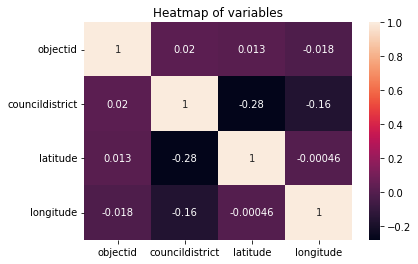

In [ ]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns,annot=True)
plt.title('Heatmap of variables')
plt.show()

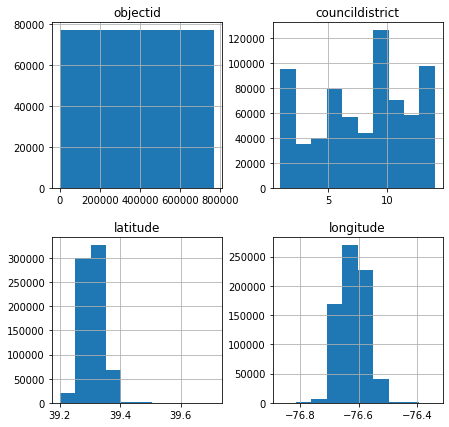

In [ ]:
plt.rcParams['figure.figsize']=(7,7)
df.hist()
plt.show()

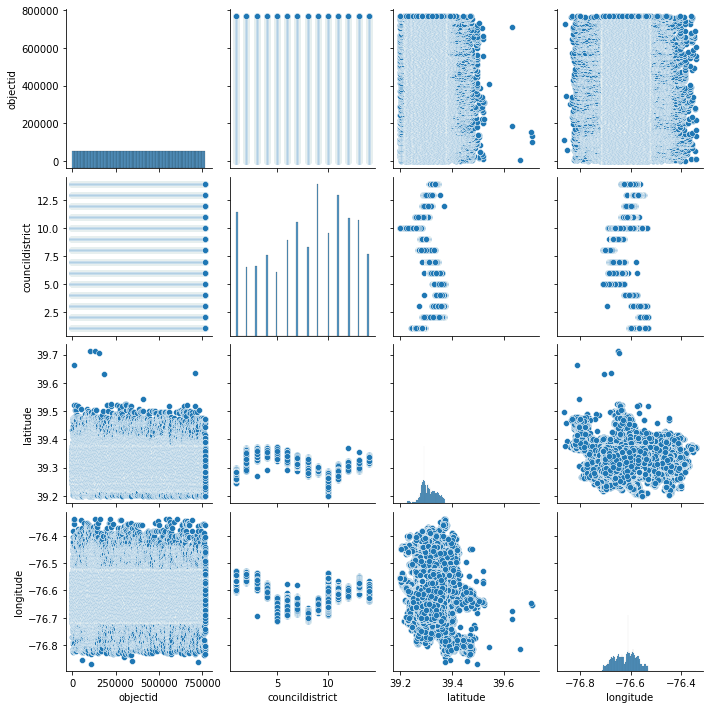

In [ ]:
sns.pairplot(df)

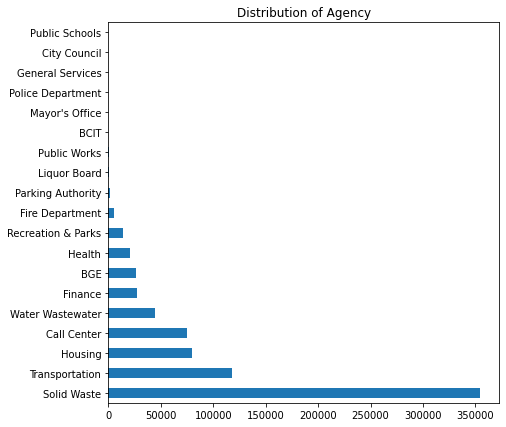

In [ ]:
df['agency'].value_counts().plot(kind='barh')
plt.title('Distribution of Agency')
plt.show()

**We can see from the above plot that there are only few agencies that receiver more service requests.**

In [ ]:
df['agency'].value_counts(dropna=False)

Solid Waste           354650
Transportation        118063
Housing                79850
Call Center            75305
Water Wastewater       44586
Finance                27032
BGE                    26509
Health                 21100
Recreation & Parks     13528
Fire Department         5509
Parking Authority       1237
Liquor Board             676
Public Works             353
BCIT                     135
Mayor's Office            40
Police Department         21
General Services          10
City Council               5
Public Schools             2
NaN                        1
Name: agency, dtype: int64

As we can see that agency's like **Liquor Board, Public Works, BCIT, Mayor's Office, Police Departmnet, Generel Services, City Council, Public Schools** have very less values when compared to other agency types. So we can get better modelling results if we drop rows containing these agency's.

In [ ]:
df['srstatus'].unique()

array(['Closed', 'Closed (Duplicate)', 'Closed (Transferred)', 'New',
       'Open', 'Pending', 'New (Duplicate)', 'Open (Duplicate)', 'Hold'],
      dtype=object)

In [ ]:
df['srstatus'].value_counts()

Closed                  732305
Closed (Duplicate)       17347
Closed (Transferred)     10719
New                       4414
Open                      3518
Hold                       110
Pending                     74
New (Duplicate)             73
Open (Duplicate)            52
Name: srstatus, dtype: int64

In [ ]:
df['outcome'].unique()

array([nan, 'SR closed by agency-specific work management system',
       'Work completed', 'Work could not be\xa0completed',
       'Work referred to another agency (NOT BY SR TRANSFER)',
       'SR assessed and no cause for action determined',
       'SR assessed and candidate for future major or capital project',
       'Reviewed', 'Investigated', 'Dispatched',
       'Form sent via postal mail', 'Assigned', 'Technician on Site',
       'Cable fault SR created', 'Removal referred', 'Contacted citizen',
       'Form received', 'Completed', 'Issued', 'Roll-off delivered',
       'Redispatched technician',
       'Create BGE-Construction/New Development', 'Requested',
       'Dispatched technician', 'Priority Dispatched',
       'Create BGE-Red Tag', 'Triaged', 'Closed',
       'Title requirement satisfied', 'Roll-off not delivered',
       'Not able to dispatch', 'Notified', 'In progress',
       'Written consent could not be obtained',
       'Safety/Access/Misc issues', 'Create TR-E

In [ ]:
df['outcome'].value_counts()

Work completed                                                   353699
SR closed by agency-specific work management system              110746
Work could not be completed                                       39120
SR assessed and no cause for action determined                     8582
Work referred to another agency (NOT BY SR TRANSFER)               7846
Investigated                                                        987
Assigned                                                            439
SR assessed and candidate for future major or capital project       390
Reviewed                                                            186
Removal referred                                                    120
Priority Dispatched                                                  98
Dispatched technician                                                85
Dispatched                                                           85
Technician on Site                                              

In [ ]:
df['methodreceived'].unique()

array(['API', 'Phone', 'Internal', 'System', 'Mail', 'Email', 'Web',
       'Other', 'Community', 'Chat', 'Twitter', nan, 'CHIP'], dtype=object)

In [ ]:
df['methodreceived'].value_counts()

Phone        370331
API          182395
System        99364
Internal      83115
Mail          21202
CHIP           7439
Email          1927
Other           331
Community        93
Web              43
Twitter           2
Chat              1
Name: methodreceived, dtype: int64

In [ ]:
df['srtype'].value_counts().head(30)

SW-Rat Rubout Proactive                  143345
SW-Bulk Scheduled                         58890
ECC-Information Request                   50028
HCD-Sanitation Property                   39435
TRS-Parking Complaint                     29182
SW-Dirty Alley                            25059
SW-HGW                                    22299
BGE-StLight(s) Out                        19809
ECC-Vehicle Look Up                       19288
TRS-48 Hour Parking/Abandoned Vehicle     16257
SW-Dirty Street                           14915
WW-Water Leak (Exterior)                  12313
SW-Mixed Refuse                           11643
HCD-Illegal Dumping                       11000
SW-Cleaning                               10395
TRM-Potholes                               8959
SW-Boarding                                8419
HCD-Vacant Building                        8280
SW-Municipal Trash Can Concern             7087
FCPF-Trial Request-Parking                 6806
SW-Appliance (White Goods)              

In [ ]:
df['srtype'].value_counts().tail(10)

WW-Water Turn On Seasonal                  3
RP-Building Maintenance (INTERNAL)         2
SW-Summer Lunch Program - Missed Pickup    2
TRM-Street Cut Notification                2
CC-Constituent Services Request            2
TEC-WO Street Markings                     2
TTR-Snow Abandoned Vehicle Relocate        1
FINBAPS-Other                              1
TRM-Sign Structure Damaged (Do not use)    1
BGE-Construction/New Development           1
Name: srtype, dtype: int64

In [ ]:
df['srtype'].nunique()

306

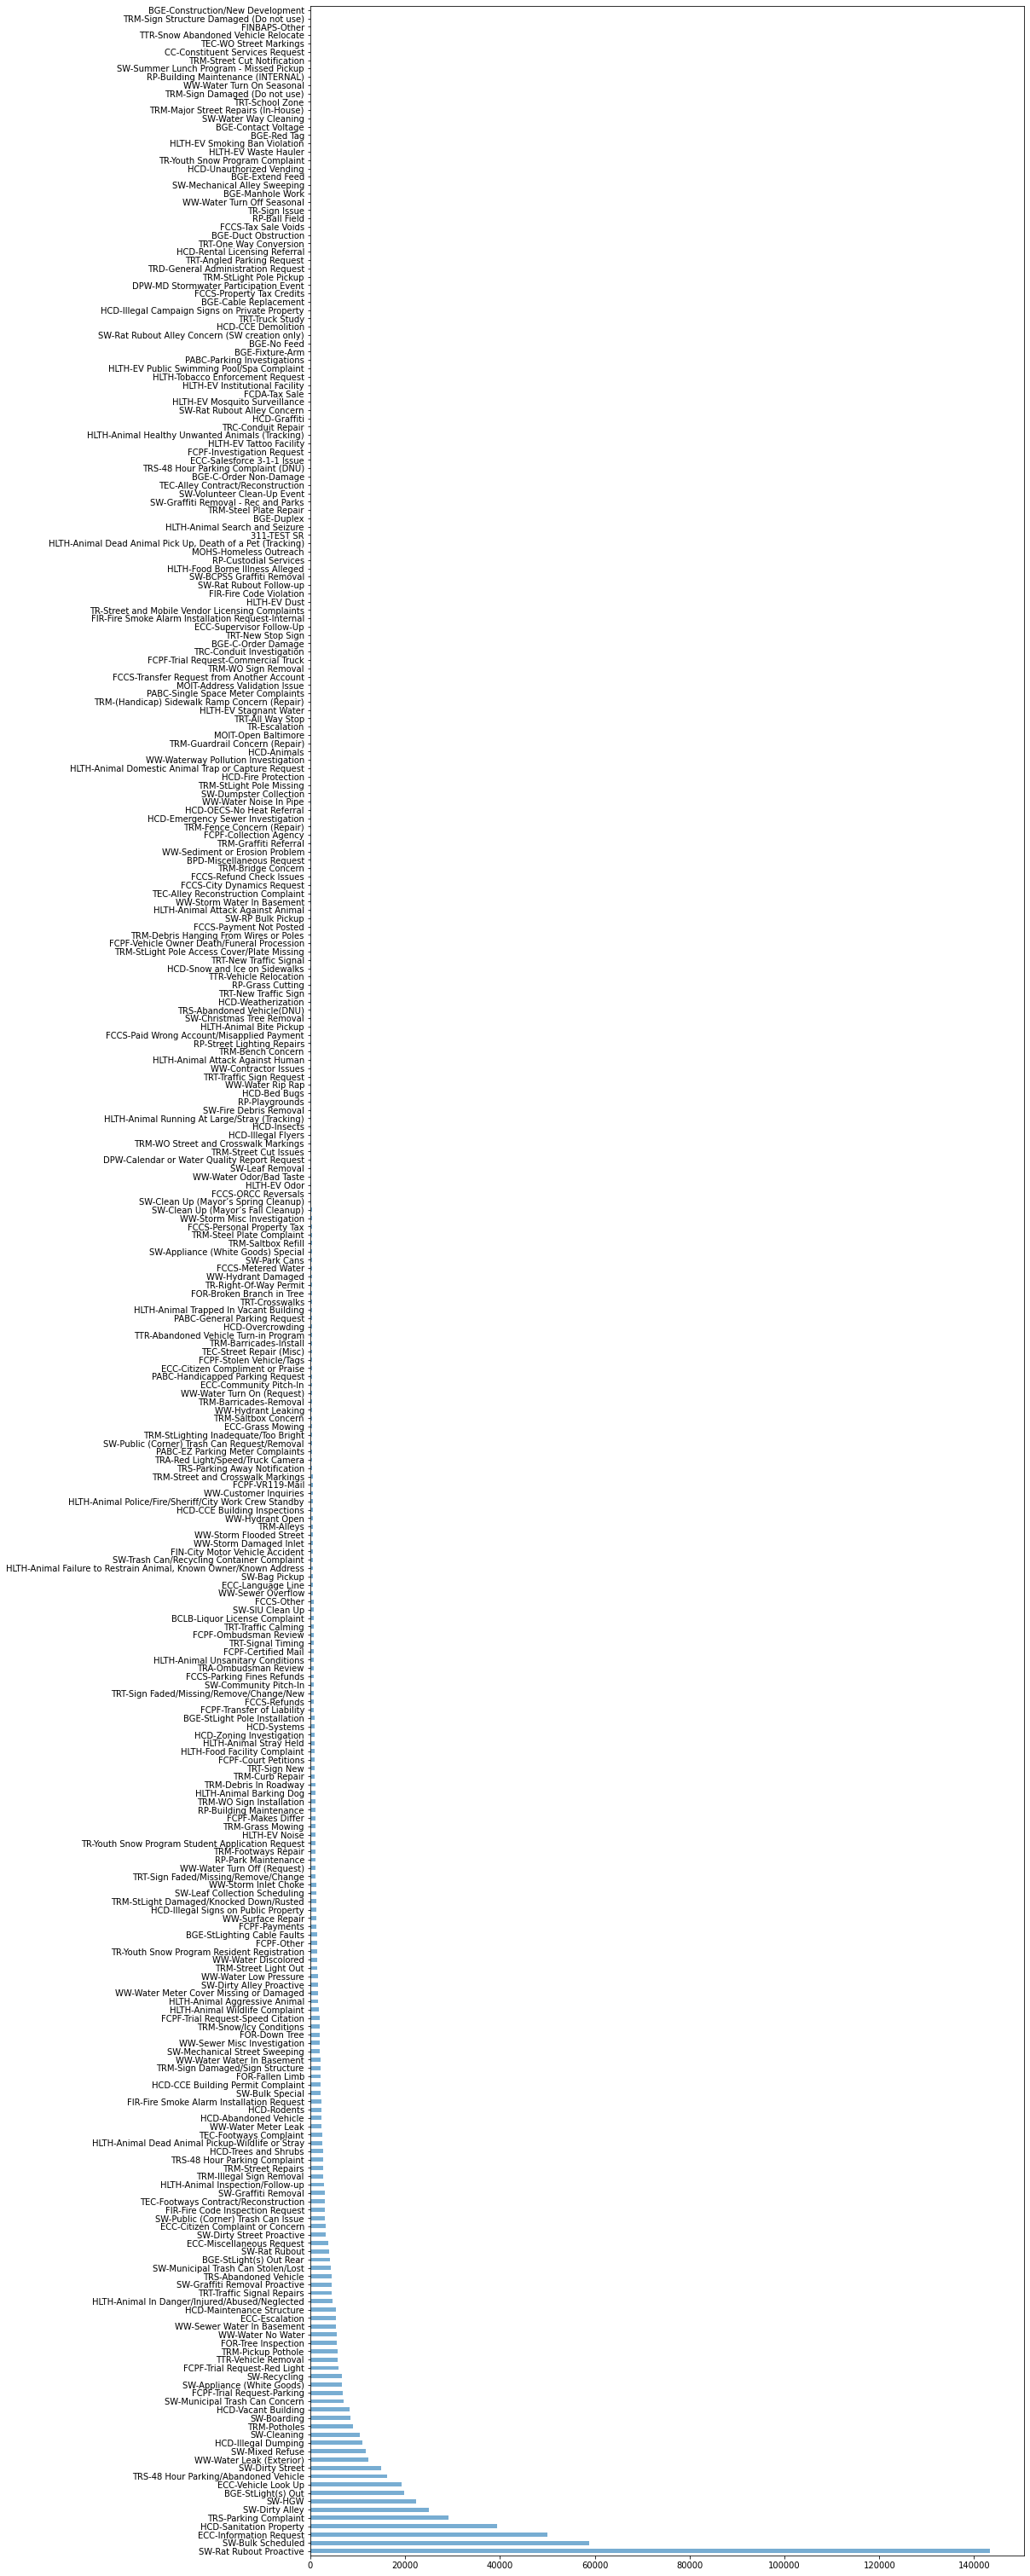

In [ ]:
df['srtype'].value_counts().plot(kind='barh',alpha=0.6,figsize=(15,55))
plt.show()

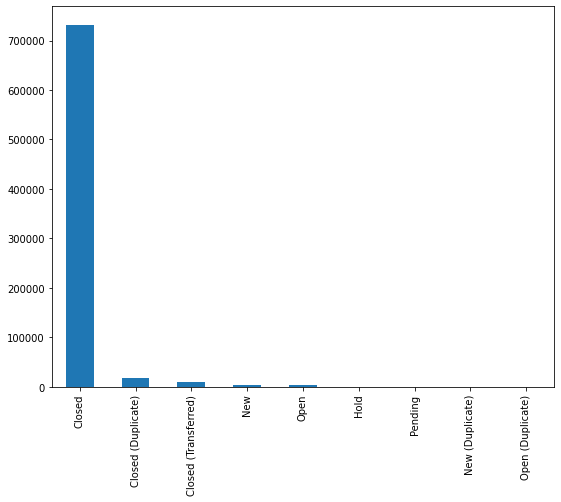

In [ ]:
df['srstatus'].value_counts().plot(kind='bar',alpha=1,figsize=(9,7))
plt.show()

**We can see from the above bar graph that most of the service requests are closed**

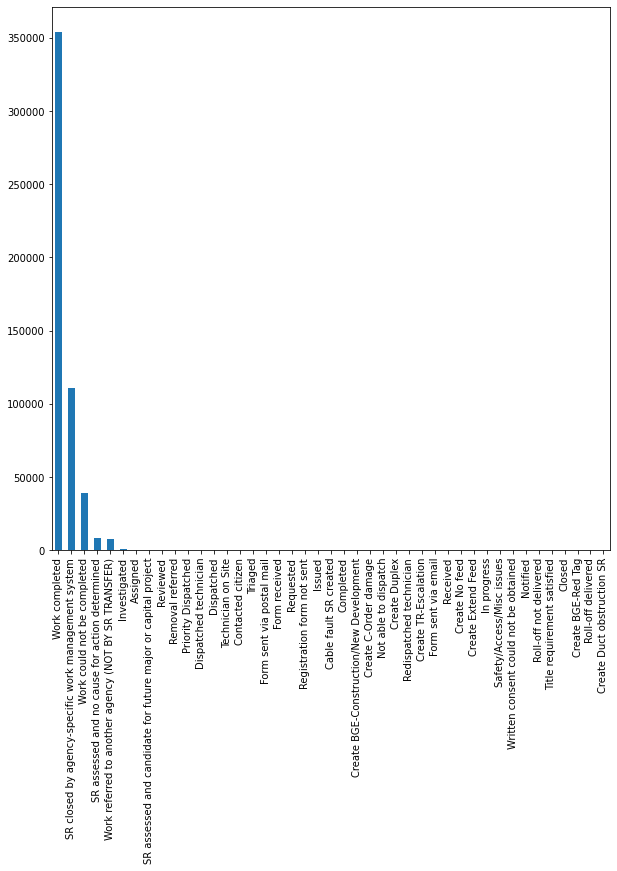

In [ ]:
df['outcome'].value_counts().plot(kind='bar',alpha=1,figsize=(10,10))
plt.show()

In [ ]:
df['agency'].nunique()

19

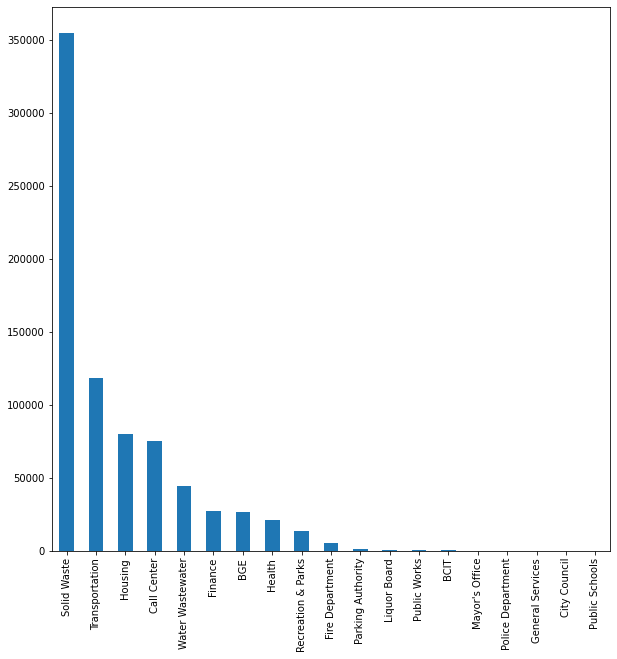

In [ ]:
df['agency'].value_counts().plot(kind='bar',alpha=1,figsize=(10,10))
plt.show()

In [ ]:
df['outcome'].value_counts()

Work completed                                                   353699
SR closed by agency-specific work management system              110746
Work could not be completed                                       39120
SR assessed and no cause for action determined                     8582
Work referred to another agency (NOT BY SR TRANSFER)               7846
Investigated                                                        987
Assigned                                                            439
SR assessed and candidate for future major or capital project       390
Reviewed                                                            186
Removal referred                                                    120
Priority Dispatched                                                  98
Dispatched technician                                                85
Dispatched                                                           85
Technician on Site                                              

In [ ]:
df["outcome"][0]

nan

In [ ]:
df.shape
list = ["Work completed","SR closed by agency-specific work management system","Work could not be completed","SR assessed and no cause for action determined",
        "Work referred to another agency (NOT BY SR TRANSFER)"]
for i in range(1,df.shape[0]):
  if df["outcome"][i] not in list:
    df["outcome"][i] = "other"
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
methodreceived = ((df.methodreceived.value_counts()/df.methodreceived.count())*100)[:10]
labels = methodreceived.index
values = methodreceived.values

trace = go.Pie(labels=labels, values=values)
fig = go.Figure(data=[trace])
iplot(fig)

In [ ]:
df['methodreceived'].value_counts()

Phone        370331
API          182394
System        99364
Internal      83115
Mail          21202
CHIP           7439
Email          1927
Other           331
Community        93
Web              43
Twitter           2
Chat              1
Name: methodreceived, dtype: int64

In [ ]:
%df['outcome'].isnull().sum()

1

In [ ]:
df = df.dropna(axis=0, subset=['outcome'])

In [ ]:
df['outcome'].isnull().sum()

0

In [ ]:
df.drop(columns=['createddate','statusdate','duedate','closedate'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.drop(columns=['geolocation','latitude','longitude'],inplace=True)

In [ ]:
df.shape

(768611, 15)

In [ ]:
df2=df
df2

,objectid,srrecordid,servicerequestnum,srtype,methodreceived,srstatus,agency,lastactivity,lastactivitydate,outcome,address,zipcode,neighborhood,councildistrict,policedistrict
1,2,5001K00000k3cb0QAA,19-00096301,BGE-StLight(s) Out Rear,API,Closed,BGE,Service Response,2019/02/19 23:25:15+00,SR closed by agency-specific work management s...,"3196 STRANDEN RD, BALTIMORE, 21230",21230,Lakeland,10.0,Southern
2,3,5001K00000k3cbyQAA,19-00096302,HCD-Sanitation Property,API,Closed,Housing,Service Response,2019/02/21 14:46:00+00,Work completed,"3612 ESTHER PL, Baltimore City, 21224",21224,Baltimore Highlands,1.0,Southeastern
3,4,5001K00000k3cc3QAA,19-00096303,WW-Sewer Water In Basement,Phone,Closed,Water Wastewater,Service Response,2019/03/14 14:24:30+00,SR closed by agency-specific work management s...,"4701 MANNASOTA AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern
4,5,5001K00000k3cc8QAA,19-00096304,TRM-Snow/Icy Conditions,API,Closed,Transportation,Service Response,2019/02/20 14:53:00+00,Work completed,"2900 ARUNAH AVE, Baltimore City, 21216",21216,Franklintown Road,9.0,Southwestern
5,6,5001K00000k3cchQAA,19-00096305,BGE-StLight(s) Out,API,Closed,BGE,Service Response,2019/02/19 23:45:16+00,SR closed by agency-specific work management s...,"2573 SOUTHDENE AVE, Baltimore City, 21230",21230,Lakeland,10.0,Southern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768607,768608,5004M00000ZZ62UQAT,19-00646797,SW-Bulk Scheduled,Phone,Closed,Solid Waste,Service Response,2019/10/21 08:21:48+00,other,"5326 TODD AVE, Baltimore City, 21206",21206,Frankford,2.0,Northeastern
768608,768609,5004M00000ZZ62yQAD,19-00646801,HCD-Sanitation Property,Phone,Closed,Housing,Service Response,2019/09/30 07:18:00+00,Work completed,"4107 BELVIEU AVE, Baltimore City, 21215",21215,West Arlington,6.0,Northwestern
768609,768610,5004M00000ZZ62ZQAT,19-00646798,SW-Rat Rubout Proactive,System,Closed,Solid Waste,Service Response,2019/09/26 08:53:14+00,Work completed,"705 S DEAN ST, Baltimore City, 21224",21224,Brewers Hill,1.0,Southeastern
768610,768611,5004M00000ZZ633QAD,19-00646802,SW-Rat Rubout Proactive,System,Closed,Solid Waste,Service Response,2019/09/26 08:53:34+00,Work completed,"709 S DEAN ST, Baltimore City, 21224",21224,Brewers Hill,1.0,Southeastern


In [ ]:
main_df = df2[["methodreceived","agency","outcome"]]

In [ ]:
main_df.head(10)

,methodreceived,agency,outcome
1,API,BGE,SR closed by agency-specific work management s...
2,API,Housing,Work completed
3,Phone,Water Wastewater,SR closed by agency-specific work management s...
4,API,Transportation,Work completed
5,API,BGE,SR closed by agency-specific work management s...
6,Phone,Health,Work completed
7,Phone,Health,Work completed
8,API,BGE,SR closed by agency-specific work management s...
9,API,BGE,SR closed by agency-specific work management s...
10,API,BGE,SR closed by agency-specific work management s...


In [ ]:
main_df.shape

(768611, 3)

**Converting the many unique values of the outcome column into other**

In [ ]:
list = ["Work completed","SR closed by agency-specific work management system","Work could not be completed","SR assessed and no cause for action determined",
        "Work referred to another agency (NOT BY SR TRANSFER)"]

for ind in main_df.index:
  if main_df["outcome"][ind] not in list:
    main_df["outcome"][ind] = "other"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
len(main_df["methodreceived"].unique())

13

#**Encoding the non numeric values**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labelencoder = LabelEncoder()
main_df["agency"] = labelencoder.fit_transform(main_df["agency"])
main_df["methodreceived"] = labelencoder.fit_transform(main_df["methodreceived"])
main_df["outcome"] = labelencoder.fit_transform(main_df["outcome"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
main_df.head(10)

,methodreceived,agency,outcome
1,0,1,1
2,0,8,2
3,8,18,1
4,0,17,2
5,0,1,1
6,8,7,2
7,8,7,2
8,0,1,1
9,0,1,1
10,0,1,1


#**Model Building**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
main_df_x = main_df[["methodreceived","agency"]]

In [ ]:
main_df_x

,methodreceived,agency
1,0,1
2,0,8
3,8,18
4,0,17
5,0,1
...,...,...
768607,8,16
768608,8,8
768609,9,16
768610,9,16


In [ ]:
main_df_y = main_df["outcome"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(main_df_x, main_df_y, test_size=0.33, random_state=0)

In [ ]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeRegressor())])


pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_classifier',RandomForestRegressor())])

pipelines = [pipeline_dt, pipeline_randomforest]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

pipe_dict = {0: 'Decision Tree', 1: 'RandomForest'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [ ]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.3990513362896744
RandomForest Test Accuracy: 0.7438870534059817


In [ ]:
from sklearn.model_selection import GridSearchCV

pipe = Pipeline([("regressor", DecisionTreeRegressor())])
# Creating dictionary with learning algorithms and their hyperparameters
grid_param = [
                {"regressor": [RandomForestRegressor()],
                 "regressor__max_depth":[5,8,None],
                 "regressor__min_samples_leaf":[1,2,5],
                 "regressor__max_leaf_nodes": [2, 5]}]
# creatingm a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, grid_param, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train,y_train)

In [ ]:
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

Pipeline(steps=[('classifier',
                 RandomForestClassifier(max_depth=8, max_leaf_nodes=5,
                                        min_samples_leaf=2))])
The mean accuracy of the model is: 0.6897438121446764


**if the parameters chosen are max_depth=5, max_leaf_nodes=5, min_samples_leaf=5 we get an accuracy as 69%**

**Reference:** https://github.com/krishnaik06/Pipelines-Using-Sklearn/blob/master/SklearnPipeline.ipynb